In [1]:
import numpy as np
import pandas as pd

# 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [3]:
# load numpy array
data = np.load('../../Docs/2_Train_FaceRecognition_with_ML/2_Train_FaceRecognition_with_ML/data/data_pca_50_target.npz')
data.files

['arr_0', 'arr_1']

In [4]:
data.allow_pickle = True

In [5]:
X = data['arr_0'] # pca data with 50 components
y = data['arr_1'] # target or dependent variable

In [6]:
X.shape,y.shape

((4317, 50), (4317,))

In [7]:
X

array([[ 0.89549457,  0.23437755,  0.25338436, ..., -0.70703568,
        -0.243009  , -1.32560633],
       [ 1.18719741, -0.25561728,  0.32714895, ...,  0.33371008,
         1.37079472,  1.68685826],
       [-0.76869338, -0.30290945,  0.34287244, ...,  0.48328162,
         1.1147473 ,  1.80028906],
       ...,
       [ 1.36171648,  0.59420958, -1.23315522, ..., -1.48111111,
         1.68062854,  0.65452226],
       [-1.21922298, -0.40668835, -0.44891518, ...,  0.58078393,
         0.67443973, -0.82093291],
       [ 1.26844869,  0.90444299,  0.11894202, ...,  0.02598472,
        -0.27616826,  0.46750468]])

In [8]:
y

array(['female', 'female', 'female', ..., 'male', 'male', 'male'],
      dtype=object)

### split the data into train and test

In [9]:
x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3453, 50) (864, 50) (3453,) (864,)


### training machine learning model

In [10]:
model_svc = SVC(probability=True)

param_grid = {'C':[0.5,1,10,20,30,50],
             'kernel':['rbf','poly'],
             'gamma':[0.1,0.05,0.01,0.001,0.002,0.005],
             'coef0':[0,1]}

In [11]:
model_grid = GridSearchCV(model_svc,
                          param_grid=param_grid,
                          scoring='accuracy',cv=3,verbose=2)

In [12]:
model_grid.fit(x_train,y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END ..............C=0.5, coef0=0, gamma=0.1, kernel=rbf; total time=   6.7s
[CV] END ..............C=0.5, coef0=0, gamma=0.1, kernel=rbf; total time=   6.0s
[CV] END ..............C=0.5, coef0=0, gamma=0.1, kernel=rbf; total time=   6.1s
[CV] END .............C=0.5, coef0=0, gamma=0.1, kernel=poly; total time=   4.2s
[CV] END .............C=0.5, coef0=0, gamma=0.1, kernel=poly; total time=   4.3s
[CV] END .............C=0.5, coef0=0, gamma=0.1, kernel=poly; total time=   3.9s
[CV] END .............C=0.5, coef0=0, gamma=0.05, kernel=rbf; total time=   5.1s
[CV] END .............C=0.5, coef0=0, gamma=0.05, kernel=rbf; total time=   5.1s
[CV] END .............C=0.5, coef0=0, gamma=0.05, kernel=rbf; total time=   5.0s
[CV] END ............C=0.5, coef0=0, gamma=0.05, kernel=poly; total time=   3.7s
[CV] END ............C=0.5, coef0=0, gamma=0.05, kernel=poly; total time=   3.8s
[CV] END ............C=0.5, coef0=0, gamma=0.0

GridSearchCV(cv=3, estimator=SVC(probability=True),
             param_grid={'C': [0.5, 1, 10, 20, 30, 50], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [13]:
model_grid.best_params_

{'C': 10, 'coef0': 0, 'gamma': 0.005, 'kernel': 'rbf'}

In [14]:
model_final = model_grid.best_estimator_

In [15]:
model_final.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.005,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Model Evaluation
- Classification Report
    - Precision, Recall, F1-Score
- Kappa Score
    - -ve (worst model)
    - 0 to 0.5 (bad model)
    - 0.5 to 0.7 (Good Model)
    - 0.7 to 0.9 (Excellent Model)
    - 0.9 to 1.0 (Perfect Model)
- AUC
    - Less than 0.5 (Worst Model)
    - 0.5 to 0.6 (Bad Model)
    - 0.6 to 0.8 (Good Model)
    - 0.8 to 0.9 (Excellent Model)
    - 0.9 to 1.0 (Perfect Model)

In [16]:
y_pred = model_final.predict(x_test) # predicted values

In [17]:
y_pred

array(['female', 'female', 'male', 'male', 'male', 'female', 'female',
       'female', 'male', 'female', 'male', 'female', 'female', 'female',
       'male', 'female', 'female', 'male', 'female', 'female', 'female',
       'male', 'male', 'female', 'female', 'female', 'male', 'female',
       'male', 'female', 'male', 'male', 'male', 'male', 'female',
       'female', 'male', 'male', 'male', 'female', 'male', 'male', 'male',
       'male', 'female', 'female', 'male', 'male', 'male', 'female',
       'female', 'female', 'male', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'female', 'male', 'female', 'male',
       'male', 'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'male', 'male', 'female', 'female', 'female', 'male',
       'female', 'female', 'female', 'male', 'male', 'female', 'female',
       'female', 'male', 'female', 'female', 'female', 'male', 'male',
       'male', 'female', 'female', 'female', 'male', 'female', 'female',


**Classification Report**

In [18]:
cr = metrics.classification_report(y_test,y_pred,output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
female,0.821206,0.826360,0.823775,478.000000
male,0.783290,0.777202,0.780234,386.000000
accuracy,0.804398,0.804398,0.804398,0.804398
macro avg,0.802248,0.801781,0.802004,864.000000
weighted avg,0.804266,0.804398,0.804323,864.000000


**Kappa Score**

In [19]:
metrics.cohen_kappa_score(y_test,y_pred)

0.6040136681672723

**Area Under Curve (AUC)**

In [20]:
metrics.roc_auc_score(np.where(y_test=="male",1,0),
                      np.where(y_pred=="male",1,0))

0.8017809525874217

#### Save Face Recognition Model

In [21]:
import pickle

In [22]:
pickle.dump(model_final,open('./model/model_svm.pickle',mode='wb'))

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
cv_results = pd.DataFrame(model_grid.cv_results_)

In [25]:
param = ['param_C','param_coef0','param_gamma','param_kernel']
cv_results = cv_results[param+['mean_test_score']]
cv_results[param] = cv_results[param].astype(str)

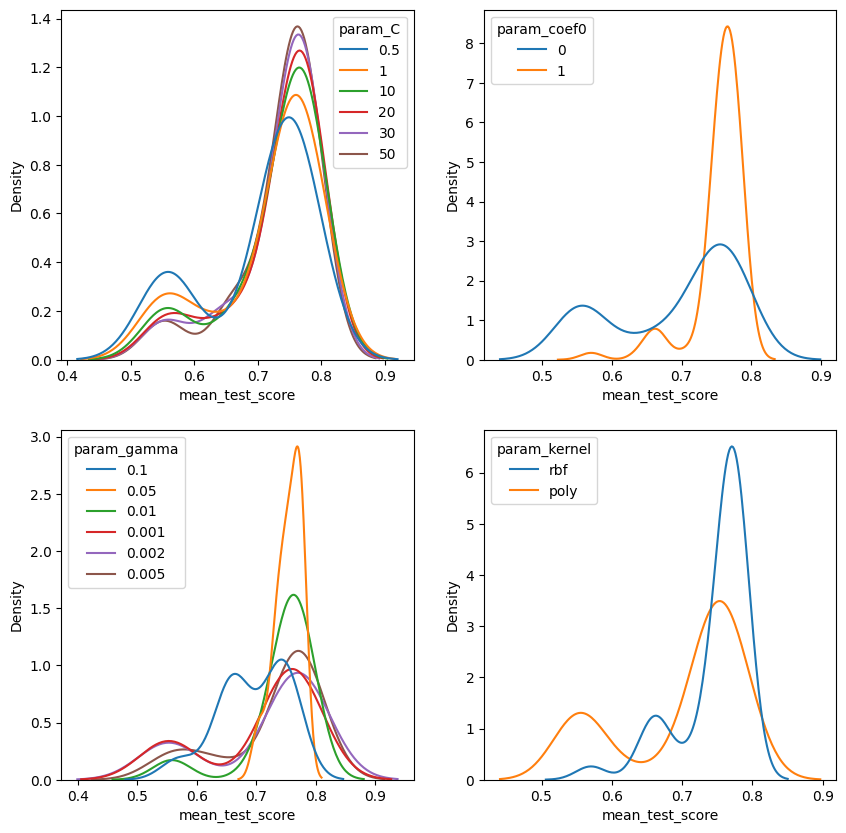

In [26]:
plt.figure(figsize=(10,10))
for i, par in enumerate(param):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=cv_results,x='mean_test_score',hue=par)

In [27]:
model_grid.best_params_

{'C': 10, 'coef0': 0, 'gamma': 0.005, 'kernel': 'rbf'}